# Partial Distance Correlation Periodogram Simulated Demonstrations

### In this notebook we will use simulated spectra to demodnstrate the Partial Distance Correlation Periodogram.

### 1 Imports & funcs

In [1]:
import sys
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import random
from scipy import interpolate
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
from scipy import signal
import winsound
from copy import deepcopy
import pandas as pd

from run_PPDC_tests import simulate_planet_around_active_star

### 3 A simulated periodically active star hosting a planet

Partial PDC and partial USuRPER periodograms for the case of
a periodically active star hosting a planet.

In [2]:
# Assigning sun-like stellar parameters to the simulated spectra
temp_star = 5800
temp_spot = 2300

log_g = 4.5
metal = 0
alpha = 0

# Choosing wavelength range (Angstrom units)
min_val = 5920
max_val = 6000

# Loading a Phoenix synthetic spectrum
template_star = Template(temp=temp_star, log_g=log_g, metal=metal, alpha=alpha, min_val=min_val, max_val=max_val)
template_spot = Template(temp=temp_spot, log_g=log_g, metal=metal, alpha=alpha, min_val=min_val, max_val=max_val)

Details: N: 35 v_sin_i: 5 spec_power_ratio: -0.005 planet_k: 0.05 snr: 100 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:05<00:00,  6.12it/s]


Velocities STD: 0.061758090833576876
Mean velocity error: 0.046959224995444734


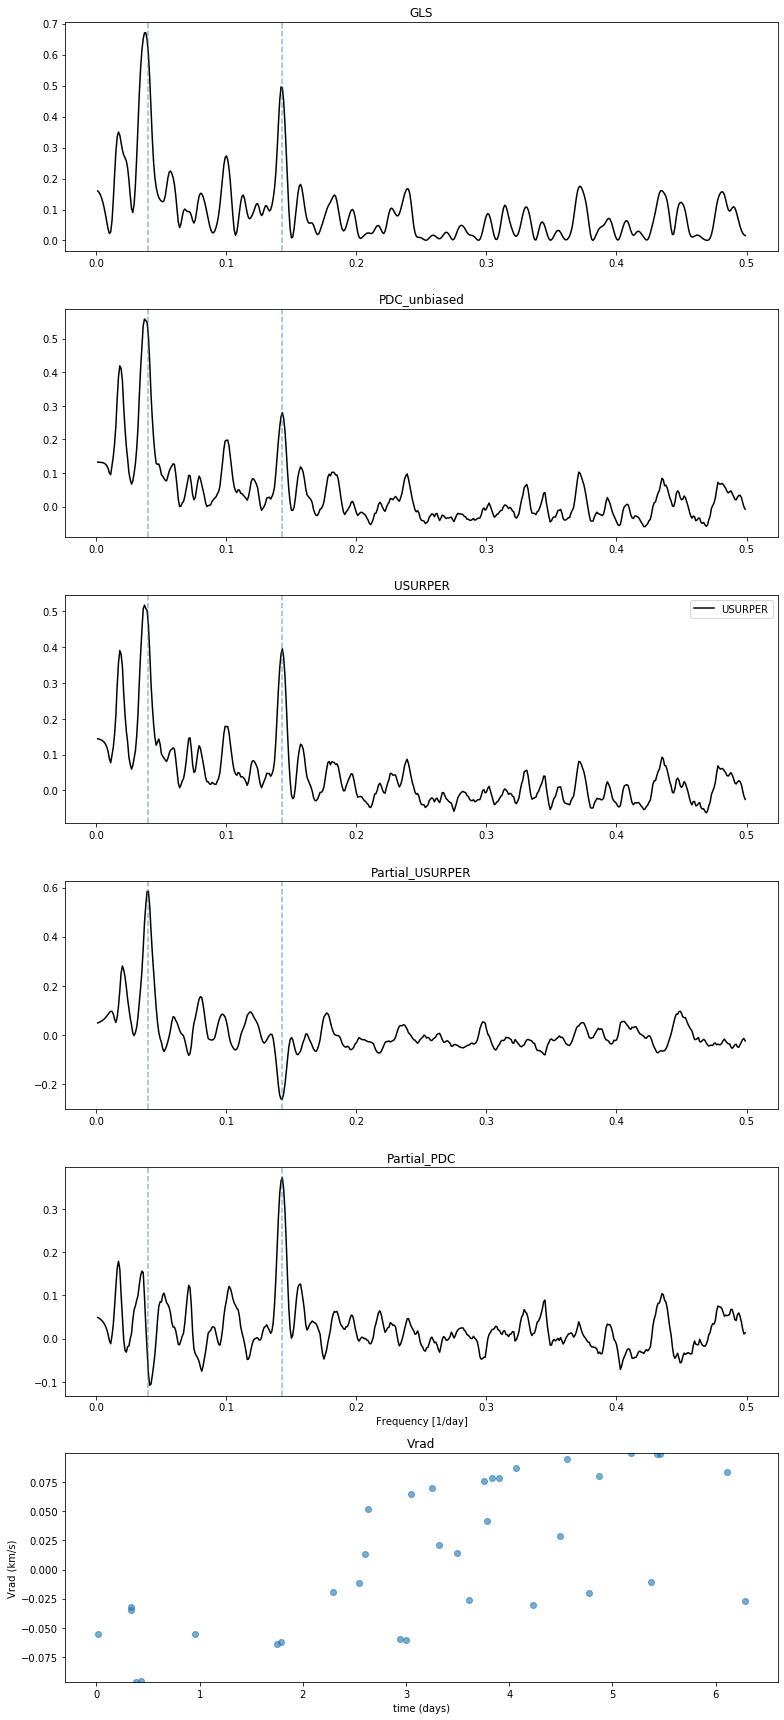

In [3]:
# defining test parameters
N = 35 # 35 oberservation will be simulated
v_sin_i = 5 # km/s
spec_power_ratio = 0.005 # The simulated spotted spectrum amounts to 0.5% of the stellar spectrum
planet_k = 0.05 # The semi-amplitude of the star reflex motion due to the planet gravity is 50 m/s
star_k = 1 # The semi-amplitude of the star RV induced by the stellar activity is 1 km/s
snr = 100 # White noise is being added

spot_period = 25 # days
planet_period = 7 # days

print("Details:", "N:", N, "v_sin_i:", v_sin_i, "spec_power_ratio:", spec_power_ratio,
  "planet_k:", planet_k, "snr:", snr, "...")

N, times, visit_spec_list, template_star_broadend =\
    simulate_planet_around_active_star(v_sin_i=v_sin_i,
                                       epsilon=0.5,
                                       integration_ratio=[],
                                       star_template=template_star,
                                       template_spot=template_spot,
                                       p_spot=spot_period,
                                       p_planet=planet_period,
                                       spec_power_ratio=spec_power_ratio,
                                       star_k=star_k,
                                       planet_k=planet_k,
                                       planet_param=[],
                                       N=N,
                                       snr=snr,
                                       periocic_spot_flag=True,
                                       seed=301)

ts = TimeSeries(size=N, times=times, vals=visit_spec_list,
            calculated_vrad_list=[])
obs = Observations(time_series=ts)

obs.initialize_periodicity_detector(freq_range=(1 / 1000, 0.5), periodogram_grid_resolution=1000)

rvs = obs.calc_rv_against_template(template_star_broadend, dv=0.01,
                             VelBound=[-8, 8], fastccf=True)
obs.observation_TimeSeries.calculated_vrad_list = rvs.vels

print("Velocities STD:", np.std(rvs.vels))
print("Mean velocity error:", np.mean(rvs.evels))

obs.periodicity_detector.run_GLS_process()
obs.periodicity_detector.run_PDC_process(calc_biased_flag=False, calc_unbiased_flag=True)
obs.periodicity_detector.run_USURPER_process(calc_biased_flag=False, calc_unbiased_flag=True)
obs.periodicity_detector.run_Partial_USURPER_process(reversed_flag=True)
obs.periodicity_detector.run_Partial_USURPER_process(reversed_flag=False)

obs.periodicity_detector.period = [planet_period, spot_period]
obs.periodicity_detector.periodogram_plots(velocities_flag=True)

plt.show()


P-value for the periodograms can be calculated, based on the methodology presented in - https://arxiv.org/abs/1912.12150

[0.0006959618992743264, 1.6990429947620995e-05]

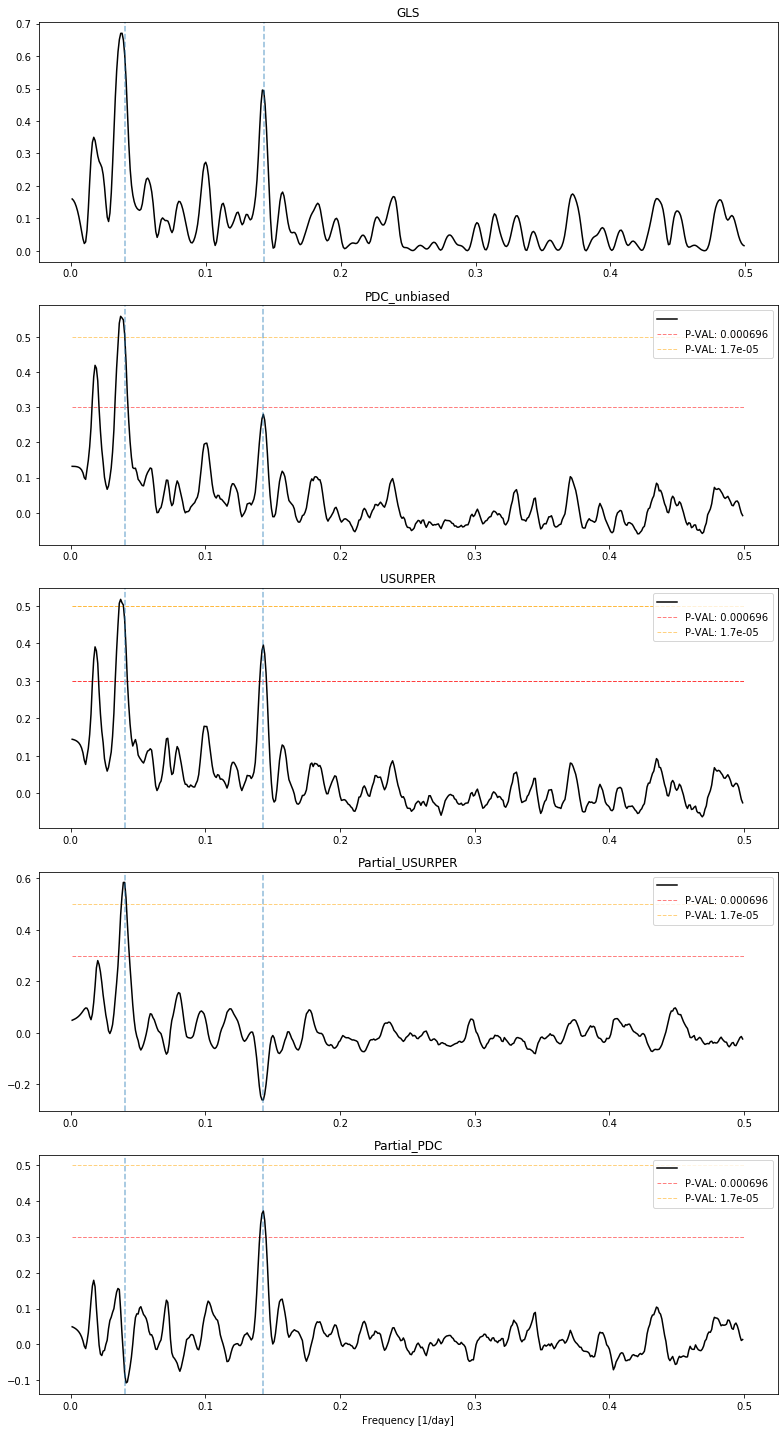

In [4]:
obs.periodicity_detector.calc_pdc_periodograms_pval([0.3, 0.5], plot=True)

As expected, GLS periodogram, as well as PDC and USuRPER periodograms, present both peaks:
One in the activity frequency and one in the planetary one.
The novel partial PDC and partial USuRPER periodograms, on the contrary, are demonstrating their power here:
Partial USuRPER present a peak only in the planetary frequency, while the partial PDC present a peak only in the activity one.

### 3 A simulated non-periodically active star hosting a planet

Partial PDC and partial USuRPER periodograms for the case of
a non-periodically active star hosting a planet.

Details: N: 35 v_sin_i: 6 spec_power_ratio: -0.005 planet_k: 0.0075 snr: 100 ...


100%|██| 35/35 [00:04<00:00,  8.38it/s]


Velocities STD: 0.04118327357028256
Mean velocity error: 0.04609812387394045


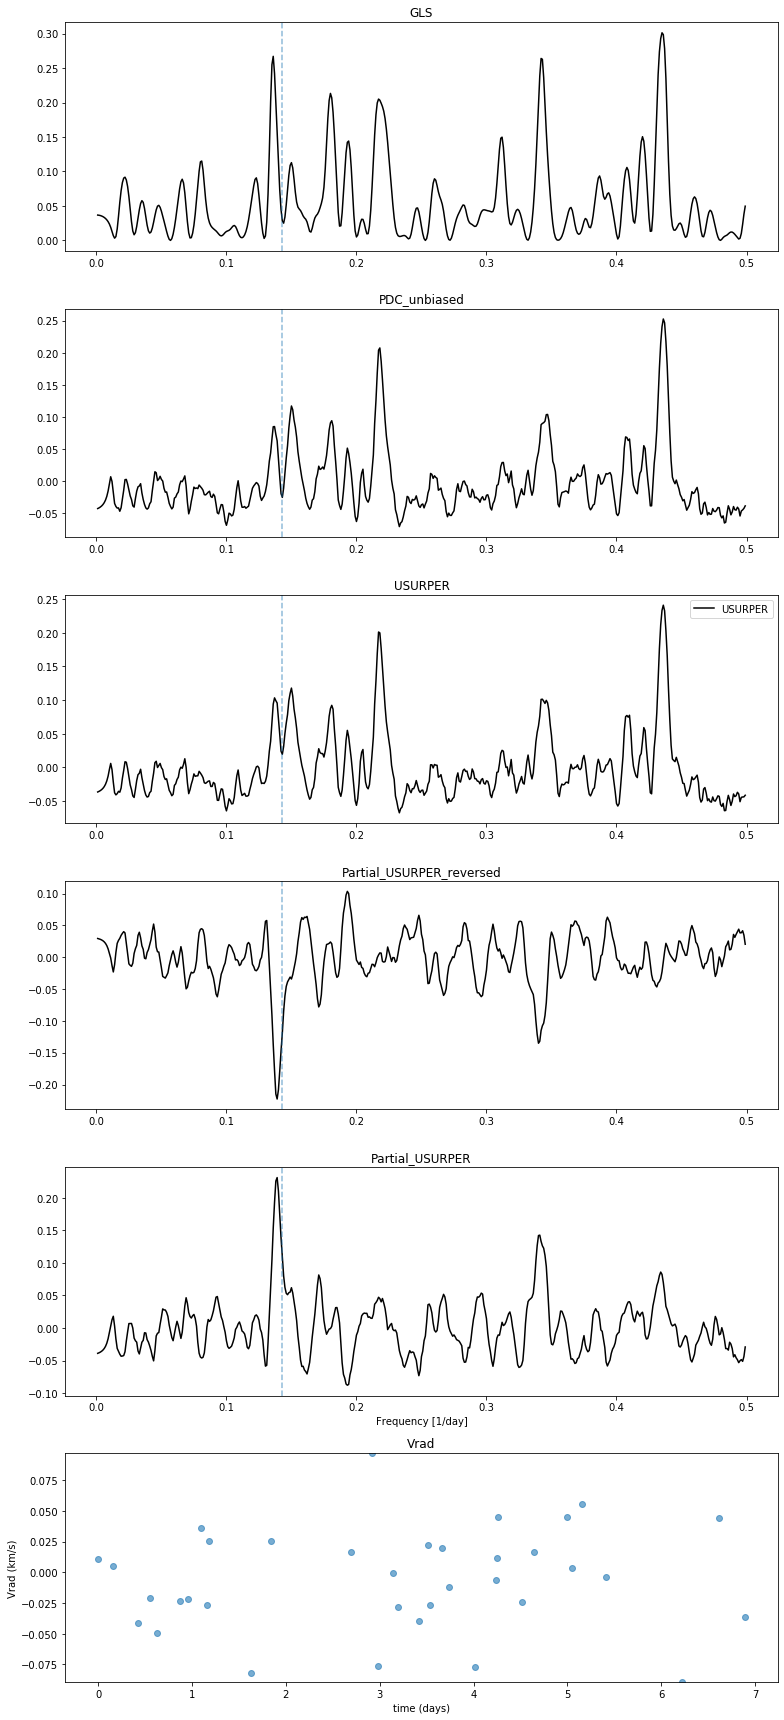

In [22]:
# defining test parameters
N = 35 # 35 oberservation will be simulated
v_sin_i = 6 # km/s
spec_power_ratio = 0.005 # The simulated spotted spectrum amounts to 0.5% of the stellar spectrum
planet_k = 0.0075 # The semi-amplitude of the star reflex motion due to the planet gravity is 7 m/s
spot_k = 1 # The semi-amplitude of the star RV induced by the stellar activity is 1 km/s
snr = 100 # White noise is being added

planet_period = 7 # days

print("Details:", "N:", N, "v_sin_i:", v_sin_i, "spec_power_ratio:", spec_power_ratio,
      "planet_k:", planet_k, "snr:", snr, "...")

N, times, visit_spec_list, template_star_broadend =\
    simulate_planet_around_active_star(v_sin_i=v_sin_i,
                                       epsilon=0.5,
                                       integration_ratio=[],
                                       star_template=template_star,
                                       template_spot=template_spot,
                                       p_spot=-1,
                                       p_planet=planet_period,
                                       spec_power_ratio=spec_power_ratio,
                                       star_k=spot_k, 
                                       planet_k=planet_k,
                                       planet_param=[],
                                       N=N,
                                       snr=snr,
                                       periocic_spot_flag=False,
                                       seed=17)
ts = TimeSeries(size=N, times=times, vals=visit_spec_list,
calculated_vrad_list=[])
obs = Observations(time_series=ts)
obs.initialize_periodicity_detector(freq_range=(1 / 1000, 0.5), periodogram_grid_resolution=1000)

rvs = obs.calc_rv_against_template(template_star_broadend, dv=0.01,
         VelBound=[-16, 16], fastccf=True)
obs.observation_TimeSeries.calculated_vrad_list = rvs.vels

print("Velocities STD:", np.std(rvs.vels))
print("Mean velocity error:", np.mean(rvs.evels))

obs.periodicity_detector.run_GLS_process()
obs.periodicity_detector.run_PDC_process(calc_biased_flag=False, calc_unbiased_flag=True)
obs.periodicity_detector.run_USURPER_process(calc_biased_flag=False, calc_unbiased_flag=True)
obs.periodicity_detector.run_Partial_USURPER_process(reversed_flag=True)
obs.periodicity_detector.run_Partial_USURPER_process(reversed_flag=False)

obs.periodicity_detector.period = [planet_period]
obs.periodicity_detector.periodogram_plots(velocities_flag=True)

plt.show()

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)


As expected, GLS periodogram, as well as PDC and USuRPER periodograms, are not performing well in this case.
The novel partial PDC and partial USuRPER periodograms, on the contrary, are demonstrating their power here:
Partial USuRPER present a sharp peak in the planetary frequency, while the partial PDC present no peak as there is no spectrum shape related periodicity in this simulated case.